In [1]:
import importlib
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from skimage import data
from scipy.misc import imresize
import tensorflow as tf

%matplotlib inline
plt.style.use('seaborn-ticks')
sys.path.append("/home/vishal/Workspace/nn-ocr")

In [2]:
# From pkmital/pycadl.
import cadl
# From this repository.
import chars_vaegan
# From indraastra/nn-ocr.
from dataset import dataset, en
import fonts as font_utils

Using TensorFlow backend.


In [3]:
import chars_mdn

FONTS = [font_utils.load_font(f) for f in en.get_fonts()]

INFO:tensorflow:Restoring parameters from vaegan_model/vaegan-700
VAE model restored.


In [4]:
importlib.reload(chars_mdn)

<module 'chars_mdn' from '/home/vishal/Workspace/cadl-work/2_mdn_char_rnn/chars_mdn.py'>

In [21]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = chars_mdn.load_mdn('./mdn_model/alpha', sess)

INFO:tensorflow:Restoring parameters from ./mdn_model/alpha/alpha.ckpt-23999
CharRNN model restored.


In [82]:
font = random.choice(FONTS)

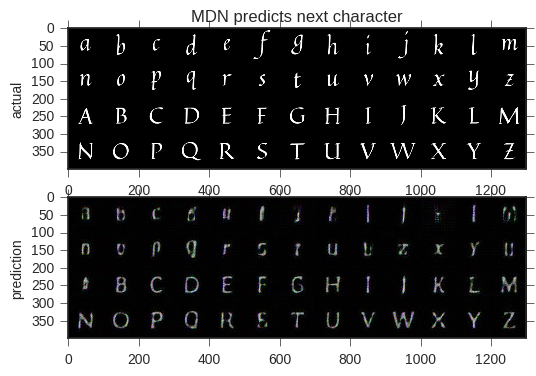

In [83]:
# Use MDN to predict the next letter from the previous (original) letter.
actual, predicted = chars_mdn.predict_from_original(sess, model, font)
chars_mdn.show_comparison(actual, predicted)

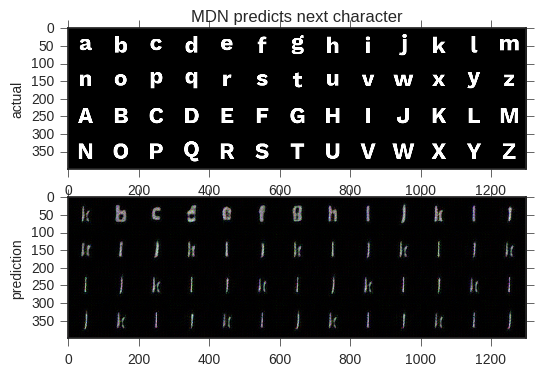

In [79]:
# Use MDN to predict the next letter from the previous predicted letter.
# The original 'a' is used to start the chain of inference, and the final
# predicted 'Z' is used to predict the 'a' displayed below.
actual, predicted = chars_mdn.predict_iteratively(sess, model, font)
chars_mdn.show_comparison(actual, predicted)